In [11]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
data = pd.read_pickle('imputed_data_forest_2.pkl')


In [ ]:
# data['total_income_USD_PPP_pHH_Yr']

In [94]:
data.head()

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,2019.0,1.0,11.19,-0.95,254.0,7.0,5.56,10.000,2.0,1.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019.0,1.0,11.19,-0.95,346.0,10.0,8.02,6.940,1.2,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019.0,1.0,11.19,-0.99,324.0,6.0,4.69,2.000,0.8,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,1.0,11.19,-0.99,326.0,6.0,4.46,6.532,0.8,5.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,1.0,11.22,-1.02,308.0,8.0,6.52,10.000,4.0,2.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)

In [3]:
X = data.drop(['Food_InsecurityLevel','YEAR','currency_conversion_factor'],axis=1)
y = data['Food_InsecurityLevel']
y.unique()

array([3, 4, 2, 1])

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import KernelPCA
transformer = SelectFromModel(estimator=RandomForestClassifier()).fit(X, y)
X_new = transformer.transform(X)
X_new.shape


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To 

(35726, 33)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

In [ ]:
print(ExtraTreesClassifier().__class__.__name__)

In [8]:
def basic_classifier_tester(classifiers, X, y):
    test_scores = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    for classifier in (classifiers):
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        test_scores[classifier.__class__.__name__] = score
        print(classifier.__class__.__name__ + ":")
        print(score)
    return test_scores    

In [64]:
# def add_scaler()

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifiers = []
classifiers.append(ExtraTreesClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(RidgeClassifierCV())
classifiers.append(SGDClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(SVC(kernel="poly"))
classifiers.append(MLPClassifier())
classifiers.append(GaussianNB())
classifiers.append(LogisticRegression(solver='liblinear'))
classifiers.append(LDA())



In [12]:
basic_classifier_scores = basic_classifier_tester(classifiers, X, y)

ExtraTreesClassifier:
0.6508060904612629
RandomForestClassifier:
0.6521495745633676
DecisionTreeClassifier:
0.6003134796238244
BaggingClassifier:
0.6737572772055531
AdaBoostClassifier:
0.5807210031347962
RidgeClassifierCV:
0.5618002686968204
SGDClassifier:
0.5523958799820868
KNeighborsClassifier:
0.5859829825347067
GradientBoostingClassifier:
0.6531571876399462


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC:
0.562807881773399
LinearSVC:
0.5666144200626959


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC:
0.31695029108822215


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier:
0.6496865203761756
GaussianNB:
0.36710703090013436


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression:
0.5700850873264667
LinearDiscriminantAnalysis:
0.566166592028661


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [13]:
basic_classifier_scores_after_fs = basic_classifier_tester(classifiers, X_new, y)

ExtraTreesClassifier:
0.6225929243170623
RandomForestClassifier:
0.6428571428571429
DecisionTreeClassifier:
0.58833407971339
BaggingClassifier:
0.6646887595163458
AdaBoostClassifier:
0.5723242274966412
RidgeClassifierCV:
0.5236229287953426
SGDClassifier:
0.514666368114644
KNeighborsClassifier:
0.5806090461262875
GradientBoostingClassifier:
0.6447604120017913


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC:
0.5401925660546351
LinearSVC:
0.5249664128974474


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC:
0.5089565606806986


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


MLPClassifier:
0.606359158083296
GaussianNB:
0.3583743842364532
LogisticRegression:
0.5291088222122705
LinearDiscriminantAnalysis:
0.5289968652037618


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [6]:
# keys = basic_classifier_scores.keys()
# values = basic_classifier_scores.values()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

# def insert_linebreak(string, lengLabel=48):
    

# keys_new = []
# for s in keys:
#     keys_new.append(insert_linebreak(string))
    
# plt.rc('font', **font)
# plt.figure(figsize=(40, 8))  # width:20, height:3
# fig, ax = plt.subplots()
# plt.bar(keys, values)
# plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.title('Classifier Performance with default hyperparameters')
# plt.xlabel('Classifiers')
# plt.ylabel('Accuracy on test data')
# fig.tight_layout()
# plt.savefig('comparison.png', dpi=200, pad_inches=4) 

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_classif
# X_new = SelectKBest(f_classif, k=).fit_transform(X, y)

In [ ]:
# from matplotlib import pyplot
# data.hist()
# pyplot.show()

In [59]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='auto', n_estimators=500, random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

# Best params {'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'n_estimators': 500}

0.7058889386475593

In [70]:
a = classifier.feature_importances_
top_10_idx = np.argsort(a)[-10:]
top_10_values = [a[i] for i in top_10_idx]
    

In [71]:
top_10_names = [X.columns[i] for i in top_10_idx]

In [72]:
top_10_values

[0.028607610742213962,
 0.028743932219244987,
 0.029182431571395894,
 0.03307756400953582,
 0.034879845522784225,
 0.04393632761707174,
 0.05079855802357828,
 0.056448559128977505,
 0.06042921305088452,
 0.06228573637680079]

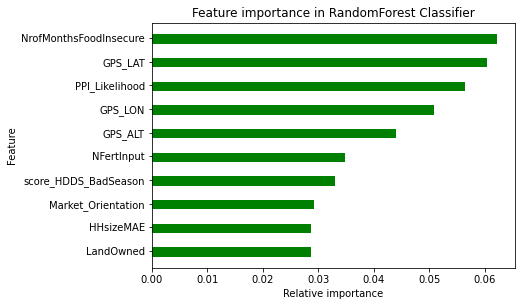

<Figure size 360x360 with 0 Axes>

In [110]:
col = top_10_names
top_10_values
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(top_10_values)) # the x locations for the groups
ax.barh(ind, top_10_values, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("Feature")
plt.savefig('randomforest_feature_importances.png',format='png',bbox_inches = "tight")
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)


In [108]:
# plt.savefig('randomforest_feature_importances.png',format='png',,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

In [81]:
y_pred = classifier.predict(X_test)

In [87]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test, average='macro')

0.6795714280964034

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["0","Food Secure", "Mildly FI", "Moderately FI", "Severely FI"])

list(le.classes_)

# le.transform(["tokyo", "tokyo", "paris"])

list(le.inverse_transform([4,3,2, 1, 0]))

['Severely FI', 'Moderately FI', 'Mildly FI', 'Food Secure', '0']

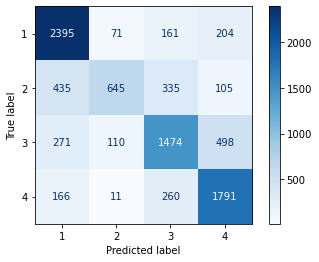

In [84]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# labels = ['Ser']
# plot_confusion_matrix(y_test, y_pred)
# HFIAS_status = ['Food Secure', 'Mildly FI', 'Moderately FI', 'Severely FI']
# y_true_strings =  le.inverse_transform(y_test)
# y_pred_strings = le.inverse_transform(y_pred)
labels=['Severely Food Insecure', 'Moderately Food Insecure', 'Mildy Food Insecure', 'Food Secure'],
plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues
                                 )

# cf_matrix = confusion_matrix(y_test, y_pred)
# print(cf_matrix)
plt.savefig('randomforest.png',format='png',bbox_inches = "tight")

In [31]:
fi = classifier.feature_importances_

In [113]:
clf_svc = SVC(C=10, gamma=0.1,kernel='rbf',random_state=0)
clf_svc.fit(X_train, y_train)
clf_svc.score(X_test, y_test)

# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

0.651589789520824

<Figure size 7200x2160 with 0 Axes>

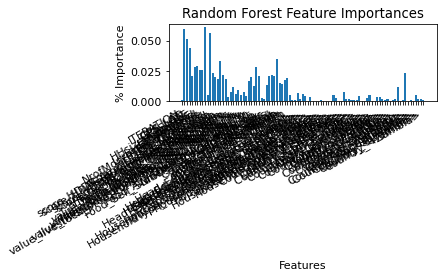

In [38]:
plt.rc('font', **font)
plt.figure(figsize=(100, 30))  # width:20, height:3
fig, ax = plt.subplots()
plt.bar(data.drop(['Food_InsecurityLevel','YEAR','currency_conversion_factor'],axis=1).columns, fi)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('% Importance')
fig.tight_layout()
# plt.savefig('comparison.png', dpi=200, pad_inches=4) 

In [9]:
print(score)

0.6343484102104792


In [118]:
clf1 = MLPClassifier(hidden_layer_sizes =(100,100))
# clf1.fit(X_train, y_train)
# clf1.score(X_test, y_test)
clf2 = RandomForestClassifier(bootstrap=False, n_estimators=500)
# clf2.fit(X_train, y_train)
clf3 = GradientBoostingClassifier( n_estimators=500)
# clf3.fit(X_train, y_train)
# clf4 = SVC()
# clf4.fit(X_train, y_train)
# clf5 = KNeighborsClassifier()
# clf5.fit(X_train, y_train)
# clf5 = DecisionTreeClassifier()
# clf5.fit(X_train, y_train)

In [ ]:
clf3 = GradientBoostingClassifier( n_estimators=500)
clf3.fit(X_train, y_train)

In [ ]:
# {'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'n_estimators': 500}
from sklearn.ensemble import *
clf1 = ExtraTreesClassifier(bootstrap= False, max_depth= 50,max_features ='auto', min_samples_leaf= 1, n_estimators= 500)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

In [119]:
vclf = VotingClassifier(estimators=[('a', clf1), ('b', clf2),['c',clf3]], voting='hard')
vclf.fit(X_train, y_train)
vclf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6969323779668607

In [120]:
vclf.score(X_test, y_test)

0.6969323779668607

In [117]:
sclf = StackingClassifier(
     estimators=[
          ('1', clf1), ('2', clf2)], final_estimator=DecisionTreeClassifier())
sclf.fit(X_train, y_train)
sclf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

0.5969547693685625

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1500, learning_rate=1.0, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)